In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [23]:
def get_data(stocks, start, end):
  stockData = yf.download(stocks, start=start, end=end)
  returns = stockData.pct_change().dropna()
  meanReturns = returns.mean()
  covMatrix = returns.cov()
  return meanReturns, covMatrix

In [24]:
stockList = ['CBA','BHP','TLS','NAB','WBC','STO']
stocks = [s + '.AX' for s in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, startDate, endDate)
weights=np.random.random(len(meanReturns))
weights/=np.sum(weights)

/tmp/ipython-input-350106322.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stockData = yf.download(stocks, start=start, end=end)
[*********************100%***********************]  6 of 6 completed


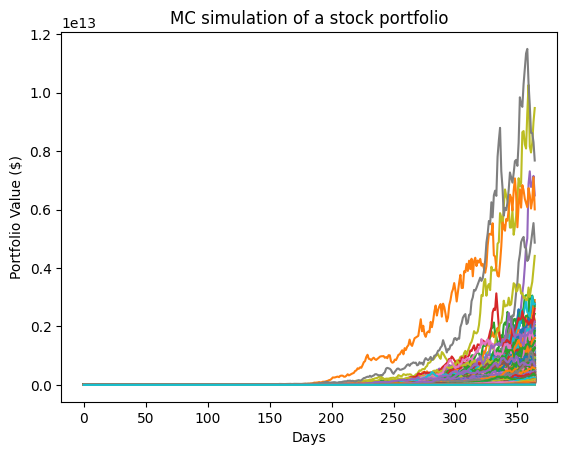

In [25]:
#Monte Carlo Method
mc_sims=10000
T=365
meanM=np.full(shape=(T,len(weights)),fill_value=meanReturns)
meanM=meanM.T
portfolio_sims=np.full(shape=(T,mc_sims),fill_value=0.0)
initialPortfolio=10000000
for m in range(0,mc_sims):
  Z=np.random.normal(size=(T,len(weights)))
  L=np.linalg.cholesky(covMatrix)
  dailyReturns=meanM + np.inner(L,Z)
  portfolio_sims[:,m]=np.cumprod(np.inner(weights,dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")
plt.show()